## Initial data exploration for top 100 corpus

In [25]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import pprint

In [74]:
# settings
plt.style.use('ggplot')
%matplotlib inline

pd.set_option("display.max_columns", 30)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.precision", 3)

import seaborn as sns
sns.set(color_codes=True)

In [44]:
CSV_PATH = './song_lyrics.csv'

df = pd.read_csv(CSV_PATH)

In [45]:
df.columns

Index([u'singer', u'title', u'lyrics'], dtype='object')

In [46]:
df.head().T

,0,1,2,3,4
singer,drake,kungs vs cookin' on 3 burners,justin timberlake,calvin harris,drake
title,one dance,this girl,can't stop the feeling,this is what you came for,too good
lyrics,"Baby, I like your style\n\nGrips on your waist\nFront way, back way\nYou know that I don't play\...",\nMoney rains from the sky above\nBut keep the change 'cause I've got enough\nA little time and ...,"\nI got this feeling inside my bones\nIt goes electric, wavey when I turn it on\nAll through my ...","\nBaby, this is what you came for\nLightning strikes every time she moves\nAnd everybody's watch...","\nDrake:\nOh yeah, yeah, yeah\nOh yeah, yeah, yeah\nYeah\n\nDrake:\nLook...I don't know how to t..."


In [47]:
df.tail().T

,85,86,87,88,89
singer,alessia cara,drake,james bay,little mix,meghan trainor
title,wild things,hotline bling,let it go,secret love song,me too
lyrics,"\nTo me, ‘where the wild things are' is a place that exists in our minds. It's a place of libert...","\nYou used to call me on my, you used to, you used to\nYou used to call me on my cell phone\nLat...",\nFrom walking home and talking loads\nTo seeing shows in evening clothes with you\nFrom nervous...,\nWhen you hold me in the street\nAnd you kiss me on the dance floor\nI wish that it could be li...,"\nIt's about us right now, girl, where you going?\nIt's about us right now, girl, where you goin..."


In [48]:
df.describe()

,singer,title,lyrics
count,90,90,90
unique,71,90,81
top,drake,hymn for the weekend,\n######\n
freq,5,1,10


In [51]:
df_new = df.copy()

In [52]:
df_new.lyrics = df_new.lyrics.str.replace('\n######\n', '')
df_new.describe()

,singer,title,lyrics
count,90,90,90
unique,71,90,81
top,drake,hymn for the weekend,
freq,5,1,10


In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
singer    90 non-null object
title     90 non-null object
lyrics    90 non-null object
dtypes: object(3)
memory usage: 2.2+ KB


In [11]:
print stopwords.words("english")

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [54]:
df_new.head()

,singer,title,lyrics
0,drake,one dance,"Baby, I like your style\n\nGrips on your waist\nFront way, back way\nYou know that I don't play\..."
1,kungs vs cookin' on 3 burners,this girl,\nMoney rains from the sky above\nBut keep the change 'cause I've got enough\nA little time and ...
2,justin timberlake,can't stop the feeling,"\nI got this feeling inside my bones\nIt goes electric, wavey when I turn it on\nAll through my ..."
3,calvin harris,this is what you came for,"\nBaby, this is what you came for\nLightning strikes every time she moves\nAnd everybody's watch..."
4,drake,too good,"\nDrake:\nOh yeah, yeah, yeah\nOh yeah, yeah, yeah\nYeah\n\nDrake:\nLook...I don't know how to t..."


In [55]:
df_new['lyrics'][0]

"Baby, I like your style\n\nGrips on your waist\nFront way, back way\nYou know that I don't play\nStreets not safe\nBut I never run away\nEven when I'm away\n\nOti, oti\nThere's never much love when we go OT\nI pray to make it back in one piece\nI pray, I pray\n\nThat's why I need a one dance\nGot a Hennessy in my hand\nOne more time 'fore I go\nHigher powers taking a hold on me\n\nI need a one dance\nGot a Hennessy in my hand\nOne more time 'fore I go\nHigher powers taking a hold on me\n\nBaby, I like your style\n\nStrength and guidance\nAll that I'm wishing for my friends\nNobody makes it from my ends\nI had to bust up the silence\n\nYou know you gotta stick by me\nSoon as you see the text, reply me\nI don't wanna spend time fighting\nWe've got no time\n\nAnd that's why I need a one dance\nGot a Hennessy in my hand\nOne more time 'fore I go\nHigher powers taking a hold on me\n\nI need a one dance\nGot a Hennessy in my hand\nOne more time 'fore I go\nHigher powers taking a hold on me\

In [56]:
first_song = df_new['lyrics'][0]

In [57]:
type(first_song)

str

In [58]:
tokens = word_tokenize(first_song)

In [59]:
print tokens[:30]

['Baby', ',', 'I', 'like', 'your', 'style', 'Grips', 'on', 'your', 'waist', 'Front', 'way', ',', 'back', 'way', 'You', 'know', 'that', 'I', 'do', "n't", 'play', 'Streets', 'not', 'safe', 'But', 'I', 'never', 'run', 'away']


In [60]:
word_tokens = [w.lower() for w in tokens]
word_vocab = sorted(word_tokens)

In [61]:
print word_vocab

["'cause", "'cause", "'cause", "'cause", "'fore", "'fore", "'fore", "'fore", "'fore", "'fore", "'ll", "'m", "'m", "'re", "'re", "'re", "'re", "'s", "'s", "'s", "'ve", ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', '?', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'all', 'and', 'and', 'and', 'and', 'and', 'and', 'and', 'and', 'and', 'and', 'and', 'as', 'away', 'away', 'baby', 'baby', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'bust', 'but', 'by', 'control', 'dance', 'dance', 'dance', 'dance', 'dance', 'dance', 'do', 'do', 'do', 'down', 'down', 'down', 'down', 'ends', 'even', 'fighting', 'for', 'friends', 'from', 'front', 'girl', 'girl', 'girl', 'girl', 'go', 'go', 'go', 'go', 'go', 

In [62]:
stop_words_removed = [w for w in word_vocab if not w in stopwords.words("english")]

In [63]:
print stop_words_removed

["'cause", "'cause", "'cause", "'cause", "'fore", "'fore", "'fore", "'fore", "'fore", "'fore", "'ll", "'m", "'m", "'re", "'re", "'re", "'re", "'s", "'s", "'s", "'ve", ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', '?', 'away', 'away', 'baby', 'baby', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'bust', 'control', 'dance', 'dance', 'dance', 'dance', 'dance', 'dance', 'ends', 'even', 'fighting', 'friends', 'front', 'girl', 'girl', 'girl', 'girl', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'got', 'got', 'got', 'got', 'got', 'got', 'got', 'got', 'got', 'grips', 'guidance', 'hand', 'hand', 'hand', 'hand', 'hand', 'hand', 'hennessy', 'hennessy', 'hennessy', 'hennessy', 'hennessy', 'hennessy', 'higher', 'higher', 'higher', 'higher', '

In [64]:
freq_dist = nltk.FreqDist(stop_words_removed)

In [143]:
from collections import Counter, OrderedDict
counter = Counter(stop_words_removed)
sorted_counter = OrderedDict(counter.most_common())
print sorted_counter

OrderedDict([(',', 38), ('back', 20), ('one', 13), ('time', 13), ('got', 9), ('go', 8), ('need', 7), ('wine', 7), ('dance', 6), ("'fore", 6), ('higher', 6), ('hennessy', 6), ('hand', 6), ('hold', 6), ('powers', 6), ('taking', 6), ('long', 5), ('girl', 4), ("'cause", 4), ("'re", 4), ('pray', 3), ("'s", 3), ('know', 3), ('oh', 3), ('yeah', 3), ('love', 2), ('baby', 2), ('make', 2), ('wan', 2), ('style', 2), ('na', 2), ('away', 2), ('oti', 2), ('way', 2), ('never', 2), ("'m", 2), ('like', 2), ("n't", 2), ('control', 1), ('text', 1), ('spend', 1), ('wishing', 1), ('see', 1), ('run', 1), ('soon', 1), ('even', 1), ('slow', 1), ("'ll", 1), ('bust', 1), ('much', 1), ('take', 1), ('pretty', 1), ('grips', 1), ('tell', 1), ('?', 1), ('ends', 1), ('nobody', 1), ('ta', 1), ('strength', 1), ('streets', 1), ('reply', 1), ('front', 1), ('friends', 1), ('waist', 1), ('play', 1), ('safe', 1), ('piece', 1), ('fighting', 1), ("'ve", 1), ('lose', 1), ('ot', 1), ('makes', 1), ('guidance', 1), ('silence', 1)

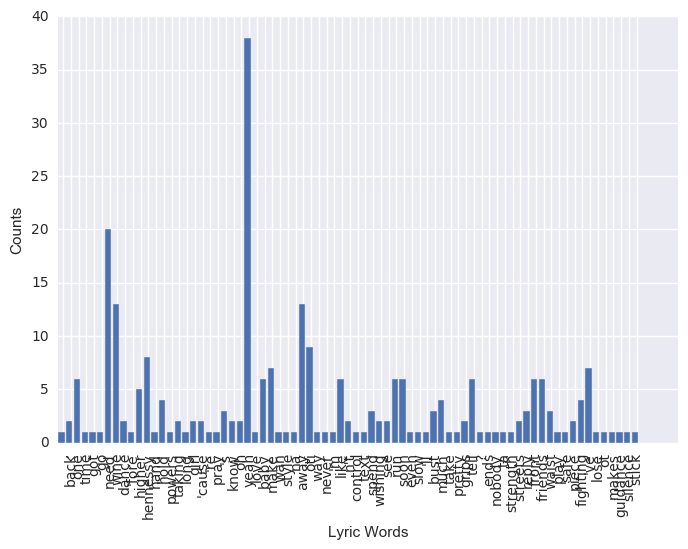

In [146]:
lyrics_words = sorted_counter.keys()
lyrics_counts = counter.values()

indexes = np.arange(len(lyrics_words))
width = 0.8
plt.bar(indexes, lyrics_counts, width)
plt.xticks(indexes + width * 0.75, lyrics_words, rotation=90)
plt.ylabel('Counts')
plt.xlabel('Lyric Words')
plt.show()

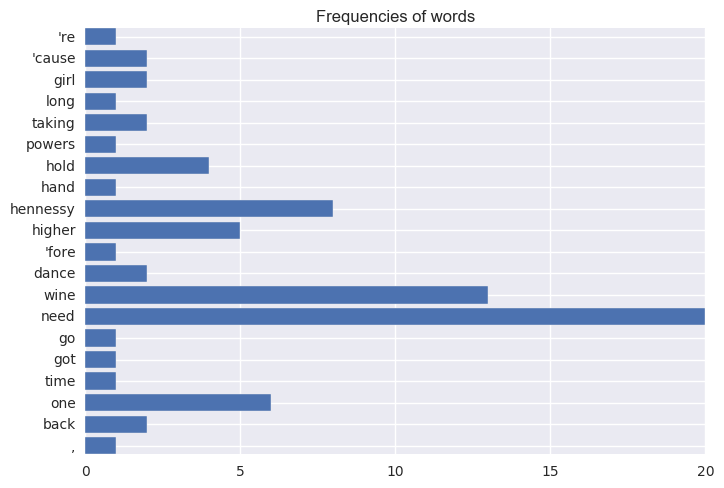

In [142]:
import matplotlib.ticker as ticker

lyrics_words = sorted_counter.keys()[:20]
y_axis = np.arange(len(lyrics_words))
lyrics_counts = counter.values()[:20]

ax = plt.axes()
ax.yaxis.set_major_locator(ticker.FixedLocator((y_axis)))
ax.yaxis.set_major_formatter(ticker.FixedFormatter((lyrics_words)))

plt.barh(y_axis, lyrics_counts, align='center')
plt.yticks(y_axis, lyrics_words)
plt.title('Frequencies of words')
plt.show()

In [67]:
len(freq_dist)

75

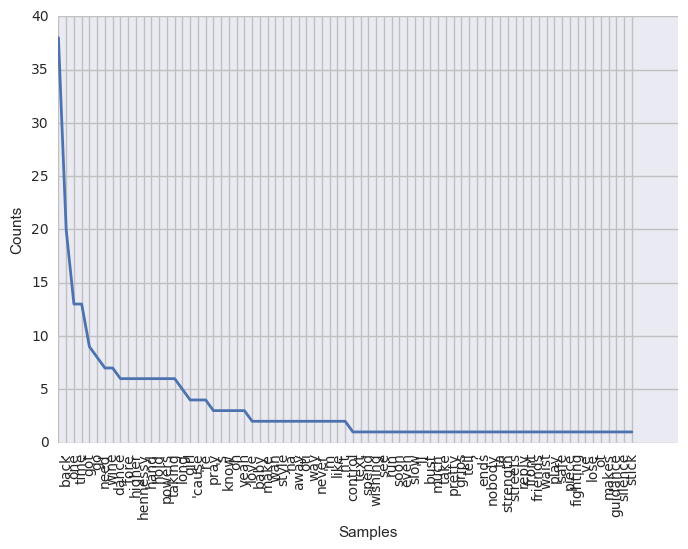

In [80]:
freq_dist.plot()